<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим-типы-данных-и-пропуски" data-toc-modified-id="Проверим-типы-данных-и-пропуски-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверим типы данных и пропуски</a></span></li><li><span><a href="#Рассчитаем-эффективность-обогащения." data-toc-modified-id="Рассчитаем-эффективность-обогащения.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Рассчитаем эффективность обогащения.</a></span></li><li><span><a href="#Признаки,-недоступные-в-тестовой-выборке." data-toc-modified-id="Признаки,-недоступные-в-тестовой-выборке.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Признаки, недоступные в тестовой выборке.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm

pd.set_option('max_columns', None)
pd.options.mode.chained_assignment = None

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

### Проверим типы данных и пропуски

In [3]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Первый столбец 'date' содержит дату в текстовом виде, преобразуем тип данных к типу 'дата'.

In [4]:
full['date'] = pd.to_datetime(full['date'], format='%Y-%m-%d %H:%M:%S')
full['date'].dtype == 'datetime64[ns]'

True

In [5]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')
train['date'].dtype == 'datetime64[ns]'

True

In [6]:
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
test['date'].dtype == 'datetime64[ns]'

True

In [7]:
test_with_answers = full.loc[full['date'].isin(test['date'])]

In [8]:
full.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

Из результатов info() видно, что в данных есть немногочисленные пропуски. Данные столбеца 'data' позволяют судить, что данные собираются каждый час. Поэтому немногочисленные пропуски заполним ближайшим предыдущим значением (вместо удаления). Существенного влияния на анализ это оказать не должно, а количество строк останентся прежним.  

Также по данным видно, что в дальнейшем перед обучением модели необходимо будет сделать масштабирование данных.

In [9]:
print(f'Пропусков в обучающих данных - {full.isna().sum().sum()} ({round(full.isna().sum().sum()/full.count().sum()*100, 2)}%)\nЗаполним пропуски')
full.fillna(method='ffill', inplace=True)
print(f'Пропусков в обучающих данных - {full.isna().sum().sum()}')

Пропусков в обучающих данных - 4481 (0.27%)
Заполним пропуски
Пропусков в обучающих данных - 0


Заполним таким же образом пропуски в остальных выборках.

In [10]:
train.fillna(method='ffill', inplace=True)
print(f'Пропусков в обучающих данных - {train.isna().sum().sum()}')

Пропусков в обучающих данных - 0


In [11]:
test.fillna(method='ffill', inplace=True)
print(f'Пропусков в тестовых данных - {test.isna().sum().sum()}')

Пропусков в тестовых данных - 0


In [12]:
test_with_answers.fillna(method='ffill', inplace=True)
print(f'Пропусков в тестовых данных - {test_with_answers.isna().sum().sum()}')

Пропусков в тестовых данных - 0


### Рассчитаем эффективность обогащения.

In [13]:
def get_recovery(c, f, t): # функция рассчета эффективности обогащения.
    return 100 * (c * (f - t)) / (f * (c - t))

In [14]:
recovery = train[['rougher.output.recovery', 'final.output.recovery']]
recovery['est_rougher.output.recovery'] = get_recovery(train['rougher.output.concentrate_au'],\
                                                       train['rougher.input.feed_au'] ,train['rougher.output.tail_au'])
recovery['est_final.output.recovery'] = get_recovery(train['final.output.concentrate_au'], \
                                                     train['rougher.input.feed_au'] ,train['final.output.tail_au'])

Рассчитаем среднее абсолютное отклонение (МАЕ) между данными датасета и полученными в расчетах.

In [15]:
mean_absolute_error(recovery['rougher.output.recovery'], recovery['est_rougher.output.recovery'])

1.1131451184435918e-14

In [16]:
mean_absolute_error(recovery['final.output.recovery'], recovery['est_final.output.recovery'])

9.648696507901679e-15

Практически данные совпадают.

### Признаки, недоступные в тестовой выборке.

Рассмотрим признаки недоступные в тестовой выборке.

In [17]:
set(full.columns) - set(test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке отсутствуют выходные параметры процессов обогащения, очистки и эффективности. Т.е. мы знаем все входные параметры, но с каким результатом отработают процессы нам не известно. Надо по заданным входным условиям предсказать обогащение сырья.

### Предобработка данных

Пропуски уже обработаны, проверим типы данных столбцов, явные дубликаты и "странные" значения.

In [18]:
full.dtypes.value_counts()

float64           86
datetime64[ns]     1
dtype: int64

In [19]:
test.dtypes.value_counts()

float64           52
datetime64[ns]     1
dtype: int64

Данные обучающей и тестовой выборки имеют корректные типы данных. Один столбец дата, остальные число с плавующей точкой.

In [20]:
full.iloc[:,1:].duplicated().sum()

0

Явных дубликатов нет.  
Посмотрим минимальные и максимальные значения.

In [21]:
full.agg(['min', 'max'])

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
min,2016-01-15 00:00:00,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.003112,0.0,1.08,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.445860e-32,-798.641662,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,-4.223520e+07,-486.598675,-264.982785,-0.010548,0.010000,0.010000,0.002986,0.046369,0.010000,0.01000,0.001083,0.000568,0.000077,0.000290,0.000000,0.000000,0.000000,0.000000,0.0,0.594562,0.007566,10.014648,0.020676,-0.042069,-657.949759,-0.721806,-650.260008,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.443911,-2.593390,-649.949283,0.000000,0.000000,0.000000,0.000000,0.077503,-799.606441,0.000000,-799.873878,0.000000,-799.755798,0.000000,-809.333008,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
max,2018-08-18 10:59:59,16.001945,17.031899,19.61572,52.756638,100.0,19.552149,5.804178,22.31773,8.245022,265.983123,40.0,15.50,4.102454,16.081632,17.081278,22.458114,45.933934,29.459575,9.634565,22.276

Вот и "странности" в данных.  
- Минимальное значение концентрации в выходном продукте, в хвостах на разных этапах обогащения равно ровно 0. Такого скорее всего не может быть, особенно учитывая, что данные представлены с точностью 6 знаков после запятой. Это скорее всего ошибка измерений или выгрузки данных.  
- Максимально значение эффективности ровно 0 % или 100 %, такое вряд ли возможно.
- Максимальное значение в 2 столбцах равно 629638 и 718684, относительно остальных данных очень большие числа, надо посмотреть поподробнее.  

Посмотрим несколько максимальных значений в столбцах привлекших внимание.

In [22]:
train['rougher.calculation.floatbank10_sulfate_to_au_feed'].nlargest(7)

11117    629638.977914
2826     234425.859727
1161      20960.012239
3389      20450.367307
12120     19213.716053
8715      18035.545269
8697      17174.958207
Name: rougher.calculation.floatbank10_sulfate_to_au_feed, dtype: float64

Строки с индексами 11117 и 2826 больше максимального значения в 10 и 30 раз.

In [23]:
train['rougher.calculation.floatbank11_sulfate_to_au_feed'].nlargest(7)

11117    718684.955855
2826     337629.417668
3389      29105.606710
1161      20865.828789
2825      19812.087340
12120     19214.056617
12000     14471.521157
Name: rougher.calculation.floatbank11_sulfate_to_au_feed, dtype: float64

Такой же результат. Удалим эти 2 строки как неправдоподобные.

In [24]:
train = train.drop(index=[11117, 2826])

In [25]:
full['rougher.calculation.floatbank10_sulfate_to_au_feed'].nlargest(7)

16407    629638.977914
2826     234425.859727
1161      20960.012239
3389      20450.367307
17410     19213.716053
11335     18035.545269
11317     17174.958207
Name: rougher.calculation.floatbank10_sulfate_to_au_feed, dtype: float64

In [26]:
full = full.drop(index=[16407, 2826])

Проверим сколько нулевых значений в столбцах концентрата и эффективности.

In [27]:
def get_name(train, val):
    name = (train == val).sum()
    name = name[name > 0]
    return name

In [28]:
name = get_name(full, 0)
name

final.output.concentrate_ag                  98
final.output.concentrate_pb                  98
final.output.concentrate_sol                 98
final.output.concentrate_au                  98
final.output.recovery                        98
final.output.tail_ag                         91
final.output.tail_pb                         91
final.output.tail_sol                        91
final.output.tail_au                         91
primary_cleaner.input.depressant             18
primary_cleaner.output.concentrate_ag       108
primary_cleaner.output.concentrate_pb       114
primary_cleaner.output.concentrate_sol      116
primary_cleaner.output.concentrate_au       108
primary_cleaner.output.tail_ag              124
primary_cleaner.output.tail_pb              124
primary_cleaner.output.tail_sol             127
primary_cleaner.output.tail_au              124
rougher.output.concentrate_ag               394
rougher.output.concentrate_pb               394
rougher.output.concentrate_sol          

In [29]:
get_name(full, 100)

final.output.recovery      91
rougher.output.recovery     5
dtype: int64

Отберем только столбцы концентрата и эффективности и удалим строки содержащие 0 и 100. (как не правдоподобные значения)

In [30]:
name = list((name[:9] + name[10:27]).index)

In [31]:
for i in name :
    full = full[full[i] != 0]
    train = train[train[i] != 0]

In [32]:
print('Значений равных 100 -', get_name(full, 100))
print()
print('Значений равных   0:\n', get_name(full, 0))

Значений равных 100 - Series([], dtype: int64)

Значений равных   0:
 primary_cleaner.input.depressant            17
secondary_cleaner.state.floatbank3_a_air     6
dtype: int64


Значений равных 100 нет.  
Значений равных 0:
- 17 в столбце `primary_cleaner.input.depressant`, удалять не будем, возможно в этих процессах не использовали реагент. 
- 6 в столбце `secondary_cleaner.state.floatbank3_a_air`, удалять не будем, возможно в этих процессах не подавали воздух.

In [33]:
print('Значений равных 100 -', get_name(full, 100))

Значений равных 100 - Series([], dtype: int64)


In [34]:
print('Значений равных 100 -', get_name(train, 100))

Значений равных 100 - Series([], dtype: int64)


**Вывод:**  
- Тип столбца 'date' приведен к datetime.  
- Данные проверены на явные дубликаты.
- Удалены неправдоподобные значения.  

Данные подготовлены.

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

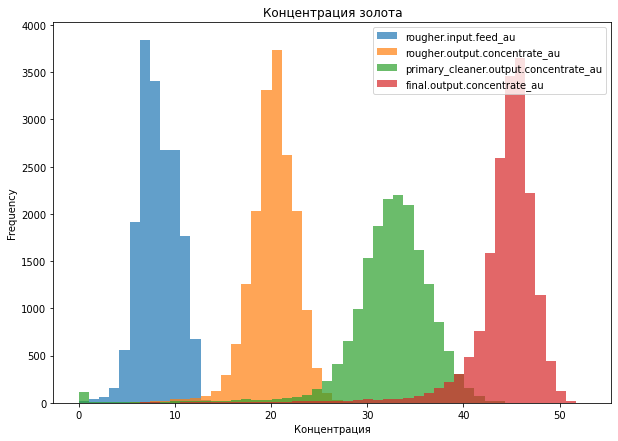

In [35]:
df = full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
df.plot.hist(figsize=(10, 7), alpha=0.7, bins=50, title='Концентрация золота').set_xlabel('Концентрация')
pass

Из гисторгаммы распределения видно, что 

Концентрация золота в процессе обогащения увеличивается.  
   - в руде концентрация 5-9 %  
   - после флотации 18-22%  
   - после первой промывки 32-35%, причем у гистограммы низкий пик, а сама гистограмма широкая, это свидетельствует о том, что наблюдаемые величины имеют значительный разброс при примерно одинаковом количестве.  
   - окончательный концентрат опять имеет высокий и узкий пик, что показывает что удается добиться примерно одинаково высокой концентрации при каждом процессе обагощения.  
Итоговое значение 45-48%.  

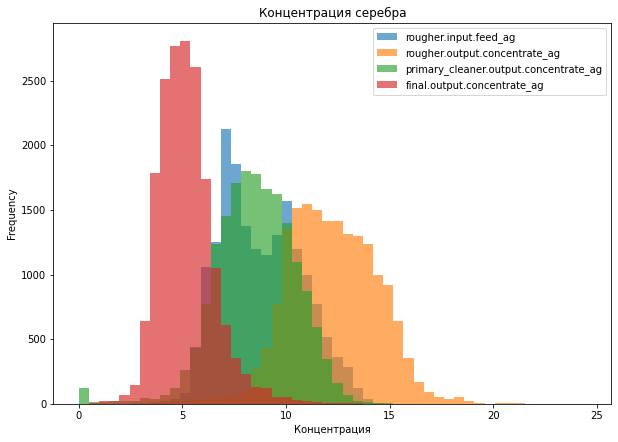

In [36]:
df = full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
df.plot.hist(figsize=(10, 7), alpha=0.65, bins=50, title='Концентрация серебра').set_xlabel('Концентрация')
pass

В процессе обогащения, концентрация серебра на этапе флотации повышается примерно с 7 до 13 %, а затем на этапах промывки уменьшается до 3-6%.

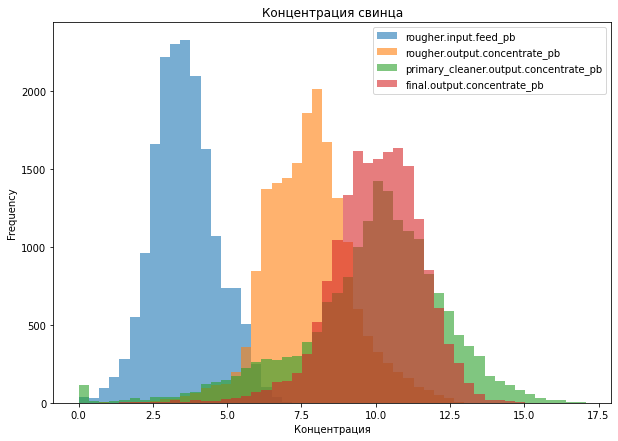

In [37]:
df = full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]
df.plot.hist(figsize=(10, 7), alpha=0.6, bins=50, title='Концентрация свинца').set_xlabel('Концентрация')
pass

Концентрация свинца увеличивается при флотации и первой промывке, во время второй промывки концентрация свинца в продукте становится более постоянным, т.е. вместо диапазона 5-15%, концентрация становится 8-11%.

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

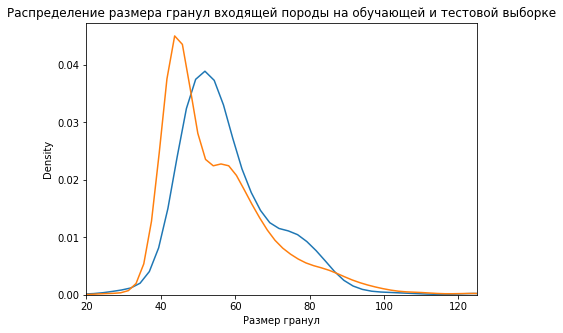

In [38]:
plt.figure(figsize=(7,5))
sns.kdeplot(data = train['rougher.input.feed_size'])
sns.kdeplot(data = test['rougher.input.feed_size'])
plt.xlim(20, 125)
plt.xlabel('Размер гранул')
plt.title('Распределение размера гранул входящей породы на обучающей и тестовой выборке');

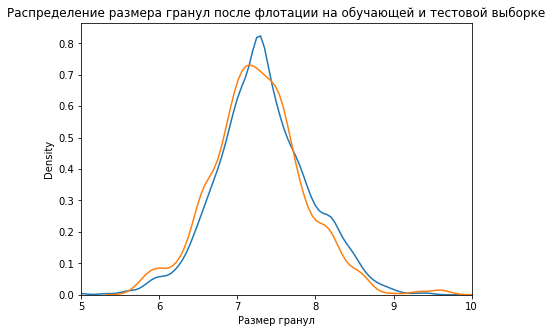

In [39]:
plt.figure(figsize=(7,5))
sns.kdeplot(data = train['primary_cleaner.input.feed_size'])
sns.kdeplot(data = test['primary_cleaner.input.feed_size'])
plt.xlim(5, 10)
plt.xlabel('Размер гранул')
plt.title('Распределение размера гранул после флотации на обучающей и тестовой выборке');

Из гисторгаммы распределения видно, что:
   - на этап флотации попадают гранулы разного размера, примерно от 40 до 90
   - после флотации все гранулы становятся почти одного размера, примерно 6-9  
т.е. они уменьшаются и становятся практически одинаковыми.  

Так же распределение показывает, что в обучающей и тестовой выборке размер гранул одинаковый.

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [40]:
conc_all = pd.DataFrame(full[['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb',\
                              'rougher.input.feed_sol']].sum(axis=1), columns=['rougher.input.feed'])

In [41]:
conc_all['rougher.output'] = full[['rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb',\
                   'rougher.output.concentrate_sol']].sum(axis=1)

In [42]:
conc_all['primary_cleaner'] = full[['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag',\
                                    'primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_sol']].sum(axis=1)

In [43]:
conc_all['final.output'] = full[['final.output.concentrate_au','final.output.concentrate_ag',\
                                    'final.output.concentrate_pb','final.output.concentrate_sol']].sum(axis=1)

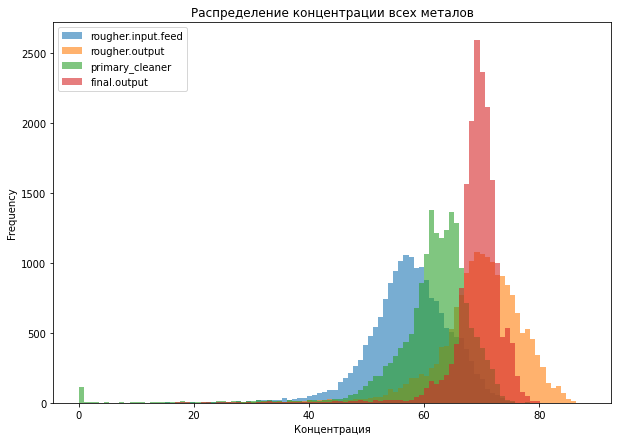

In [44]:
conc_all.plot.hist(figsize=(10, 7), alpha=0.6, bins=100, title='Распределение концентрации всех металов').set_xlabel('Концентрация')
pass

Из гистограммы видно, что на этапе флотации общая концентрация металлов повышается почти до максимального уровня, но имеет очень большой разброс от 45 до 85 %, затем на этапе первой промывки общая концентрация снижается, но разброс уменьшается, становится больше продукта с одинаковой концетрацией. На этапе второй промывки концентрация опять увеличивается и сильно уменьшается разброс. По сути общая концентрция металлов, становится почти одинаковой во всех образцах 70-75%.

**Вывод**  
На различных этапах отчистки концентрация золота стабильно повышается, серебра и свенца меняется, но остается низкой.  
Гранулы в начале процесса имеют разный размер, но после флотации становятся маленькими и практически одинаковыми.  
Размер гранул в обучающей и тестовой выборке совпадают.  
Общая концентрация металлов в процессе очистки повышается.  

## Модель

Напишем функции вычисления метрик, по которым будем оценивать модели.

In [45]:
def smape(y, ys): # Вычисляет sMAPE между предсказанием и целью
    sm = 200*abs(y-ys)/(abs(y)+abs(ys))
#    sm = sm.fillna(value=0)
    sm = sum(sm)/len(sm)
    return sm

#def sMape_scorer(estimator, X, y): # устанавливает оценщик модели
#    return smape(estimator.predict(X), y)

def smape_all(r, f): # Вычисляет итоговый sMAPE для выбора модели.
    return abs(0.25 * r + 0.75 * f)

def rating(model):  # Вычисляет итоговый sMAPE модели.
    r = cross_val_score(model, features_rougher, target_rougher, cv=5, scoring=make_scorer(smape, greater_is_better=False), n_jobs=-1).mean()
    f = cross_val_score(model, features_final, target_final, cv=5, scoring=make_scorer(smape, greater_is_better=False), n_jobs=-1).mean()
    return smape_all(r, f)

Построим модель.  
Определим признаки используемые для обучения.

In [46]:
name = list(test.columns)[1:]
features_rougher = train[name[12:34]]
features_final = train[name]
target_rougher = train['rougher.output.recovery']
target_final = train['final.output.recovery']
test_rougher = test[name[12:34]]
test_final = test[name]

Масштабируем данные

In [47]:
scaler = StandardScaler()
scaler.fit(features_rougher)
features_rougher[:] = scaler.transform(features_rougher)
test_rougher[:] = scaler.transform(test_rougher)
scaler.fit(features_final)
features_final[:] = scaler.transform(features_final)
test_final[:] = scaler.transform(test_final)

Обучим модели

In [48]:
model = LinearRegression()

In [49]:
rating(model)

9.928183416243565

In [50]:
model_DT = DecisionTreeRegressor(random_state=54321, min_samples_leaf=1, max_depth=2)

In [51]:
%%time

rating(model_DT)

CPU times: user 944 ms, sys: 39.4 ms, total: 983 ms
Wall time: 1.02 s


8.721977953509557

Переберем гиперпараметры модели.

In [52]:
%%time

r_best = 10000
model_best = 0
for leaf in tqdm(range(1, 100, 20)):
    for depth in [None] + [i for i in range(2, 11)]:
        model_DT = DecisionTreeRegressor(random_state=54321, min_samples_leaf=leaf, max_depth=depth)
        r = rating(model_DT)
        if abs(r_best) > abs(r) :
            r_best = r
            model_best = model_DT
            print(r_best, model_best)

  0%|          | 0/5 [00:00<?, ?it/s]

14.641348097781261 DecisionTreeRegressor(random_state=54321)
8.721977953509557 DecisionTreeRegressor(max_depth=2, random_state=54321)


100%|██████████| 5/5 [02:13<00:00, 26.68s/it]

CPU times: user 2min 11s, sys: 265 ms, total: 2min 12s
Wall time: 2min 13s


In [53]:
rating(model_best)

8.721977953509557

По итогам кросс-валидации лучшие результаты из рассмотренных моделей показала модель - DecisionTreeRegressor (регрессор дерева решений) с подобранными гиперпараметрами.

Проверим лучшую модель на тестовой выборке.

Для этого подготовим тестовые данные полученные из полных данных, датафрейм - `test_with_answers`. Результаты кросс-валидации и расчет метрик мы проводили на очищенных от 0 и 100 данных. Удалим эти строки из тестовых данных. 

In [54]:
twa = test_with_answers.reset_index(drop=True)

In [55]:
print(f'В тестовой "выборке с ответами" нулей - {(twa == 0).sum().sum()}, "100" - {(twa == 100).sum().sum()} ')
for i in (get_name(twa, 0)[:-1]).index :
    twa = twa[twa[i] != 0]
print(f'В тестовой "выборке с ответами" нулей - {(twa == 0).sum().sum()}, "100" - {(twa == 100).sum().sum()} ')


В тестовой "выборке с ответами" нулей - 1563, "100" - 16 
В тестовой "выборке с ответами" нулей - 6, "100" - 0 


Оставшиеся нули находятся НЕ в столбцах с концентрацией или эффективностью. Оставляем.  
Рассчитаем sMAPE на тестовой выборке.

In [56]:
def rating_test(model): # расчет метрики sMAPE на тестовой выборке
    model.fit(features_rougher, target_rougher)
    predict_model = model.predict(test_rougher.iloc[twa.index])
    r = smape(twa['rougher.output.recovery'], predict_model)
    model.fit(features_final, target_final)
    predict_model = model.predict(test_final.iloc[twa.index])
    f = smape(twa['final.output.recovery'], predict_model)
    return smape_all(r, f)

In [57]:
rating_test(model_best)

7.151468625763119

Значение sMAPE на тестовой выборке равно 18.67
Проверим нашу модель на вменяемость.

Создадим константную модель возвращаюшую среднее значение и посчитаем у нее метрику sMAPE.

In [58]:
dummy = DummyRegressor(strategy='mean')
rating_test(dummy)

7.801131324594932

sMAPE лучшей модели ближе к нулю, чем sMAPE константной модели. Значит наша модель адекватна.

**Вывод**  
Обучил несколько моделей и сделал предсказание на данным.  
Предсказывал 2 целевых признака. Для предсказания использовал разные признаки. На этапе флотации еще не известны данные, которые будут на промывках, поэтому для предсказания эффективности флотации использовал 22 признака из 52. Для предсказания эффективности всего процесса использовал все признаки.  
Данные были разного размера, поэтому перед использованием масштабировал их.  
Лучший результат из рассмотренных показала модель DecisionTreeRegressor(max_depth=2, random_state=54321).  
Итоговый sMAPE на тестовой выборке равен `7.15`.  